In [1]:
from obspy import read
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft
from scipy.fftpack import fftfreq

In [40]:
import csv



data = pd.read_csv(r"D:\frequency.csv")

frequency=data['data'].to_numpy()

In [2]:
streamE = read(r"D:\Study\ITC Q3\C1\Day 12 -online\project\1.sedimentresonance\1.sedimentresonance\NE209\*\*E.SAC", debug_headers=True)
streamN = read(r"D:\Study\ITC Q3\C1\Day 12 -online\project\1.sedimentresonance\1.sedimentresonance\NE209\*\*N.SAC", debug_headers=True)
streamZ = read(r"D:\Study\ITC Q3\C1\Day 12 -online\project\1.sedimentresonance\1.sedimentresonance\NE209\*\*Z.SAC", debug_headers=True)

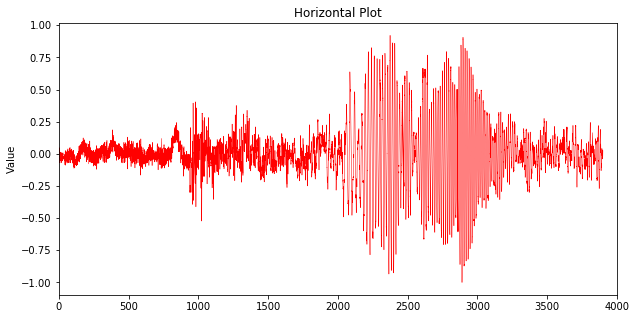

In [63]:
plt.figure(figsize=(10,5))
for tr in streamE:
    tr.normalize()
    dist = tr.stats.sac.dist
    plt.plot(tr.times(),tr.data,c="r",linewidth=0.5)
   
plt.ylabel("Value")    
#plt.ylim(-1,1)
plt.xlim(0,4000)
plt.title("Horizontal Plot")
plt.show()

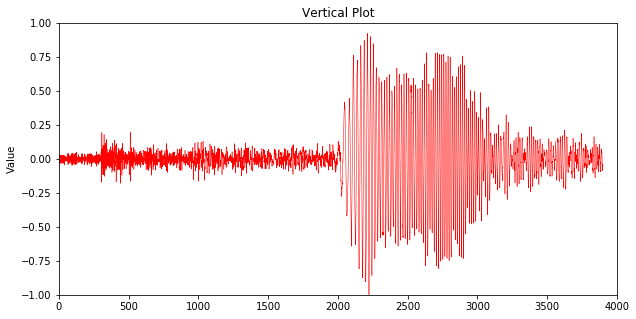

In [64]:
plt.figure(figsize=(10,5))
for tr in streamZ:
    tr.normalize()
    dist = tr.stats.sac.dist
    plt.plot(tr.times(),tr.data,c="r",linewidth=0.5)
    
plt.ylabel("Value")    
plt.ylim(-1,1)
plt.xlim(0,4000)
plt.title("Vertical Plot")
plt.show()


78001

0.05
78001
20.0


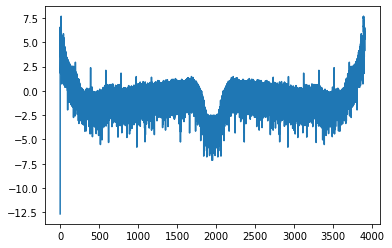

In [139]:
# calculations for vertical
for tr in streamZ:
    tr.normalize()
    time=tr.times()
    print()
    x=tr.data
    T = time[-1]-time[0] # sampling interval 
    N = x.size
    print(N)
    ffts=fft(x)
    # 1/T = frequency
    
    
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency [Hz]")
    plt.plot(np.angle(ffts),np.abs(ffts), linewidth=1.5)  # 1 / N is a normalization factor
    plt.show()

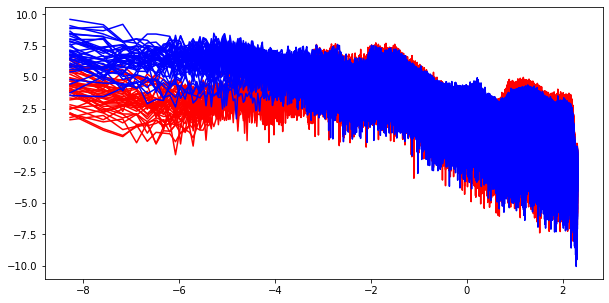

In [104]:
# calculations for vertical
plt.figure(figsize=(10,5))
amp_all_h=[]
amp_all_v=[]
for tr in streamZ:
    tr.normalize()
    time=tr.times()
    #print()
    x=tr.data
    T = time[1]-time[0] # sampling interval 
    N = x.size
    #print(N)
    ffts=fft(x)
    # 1/T = frequency
    f = np.linspace(0, 1 / T, N)
    #print(f)
    amp_v=np.abs(ffts)
    amp_all_v.append(amp_v)
    plt.plot(np.log(frequency),np.log(ffts[0:39001]),c='r')
# calculations for vertical
for tr in streamE:
    tr.normalize()
    time=tr.times()
    print()
    x=tr.data
    #print(x)
    T =( time[1]-time[0]) # sampling interval 
    #print(T)
    #print(N)
    ffts=fft(x)
    amp_h=np.abs(ffts)
    amp_all_h.append(amp_h)
    N = amp_h.size
    # 1/T = frequency
    f = np.linspace(0, 1 / T, N)
    #print(f)
    plt.plot(np.log(frequency),np.log(ffts[0:39001]),c='b')

Text(0.5, 1.0, 'S(f)')

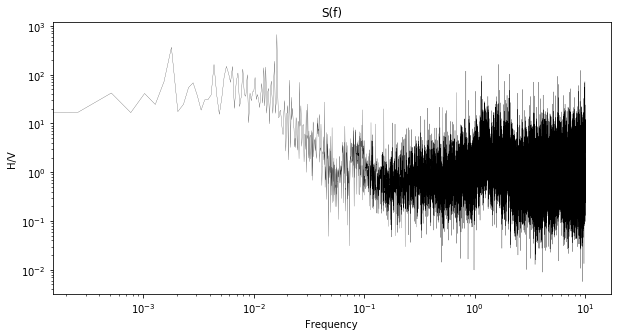

In [106]:
periods=time
plt.figure(figsize=(10,5))
f = np.fft.fftfreq(N, T)
anottot=[]
fnottot=[]
Hall=[]
for i in range(0,44):
    amp_h=amp_all_h[i]
    amp_v=amp_all_v[i]
    hBYv=amp_h/amp_v;
    anot=np.amax(hBYv)
    anottot.append(anot)
    index=np.where(hBYv[0:39001] == anot)
    ind=index[0][0]
    
    fnot=frequency[ind]
    fnottot.append(fnot)
    H=(3500)/(4*anot*fnot)
    Hall.append(H)
plt.plot(frequency,hBYv[0:39001],c='k',linewidth=0.2)
    #plt.ylim(0,10)
    #plt.xlim(0.6,0.9)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("H/V")    
plt.xlabel("Frequency")
plt.title("S(f)")

In [109]:
anota=np.asarray(anottot)
fnota=np.asarray(fnottot)
hall=np.asarray(Hall)
anot=np.amin(anota)
fnot=np.average(fnota)
height=np.average(hall[hall<600.0])

In [110]:
H=(3500)/(4*anot*fnot)
print(height)

68.3559020171
